In [124]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

### 데이터 불러오기

In [156]:
train_sp = pd.read_csv('./data_4dist/data_tr_4dist.csv')
test_sp = pd.read_csv('./data_4dist/data_ts_4dist.csv')

train_sp.rename(columns={'4단지배수지 공업 유출유량 적산차':'4dist'}, inplace=True)
test_sp.rename(columns={'4단지배수지 공업 유출유량 적산차':'4dist'}, inplace=True)

print(type(train_sp),'\n', len(train_sp))

<class 'pandas.core.frame.DataFrame'> 
 35063


In [126]:
print(train_sp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35063 non-null  object 
 1   4dist     35051 non-null  float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB
None


In [127]:
train_sp = train_sp.ffill()

In [128]:
print(train_sp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35063 non-null  object 
 1   4dist     35063 non-null  float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB
None


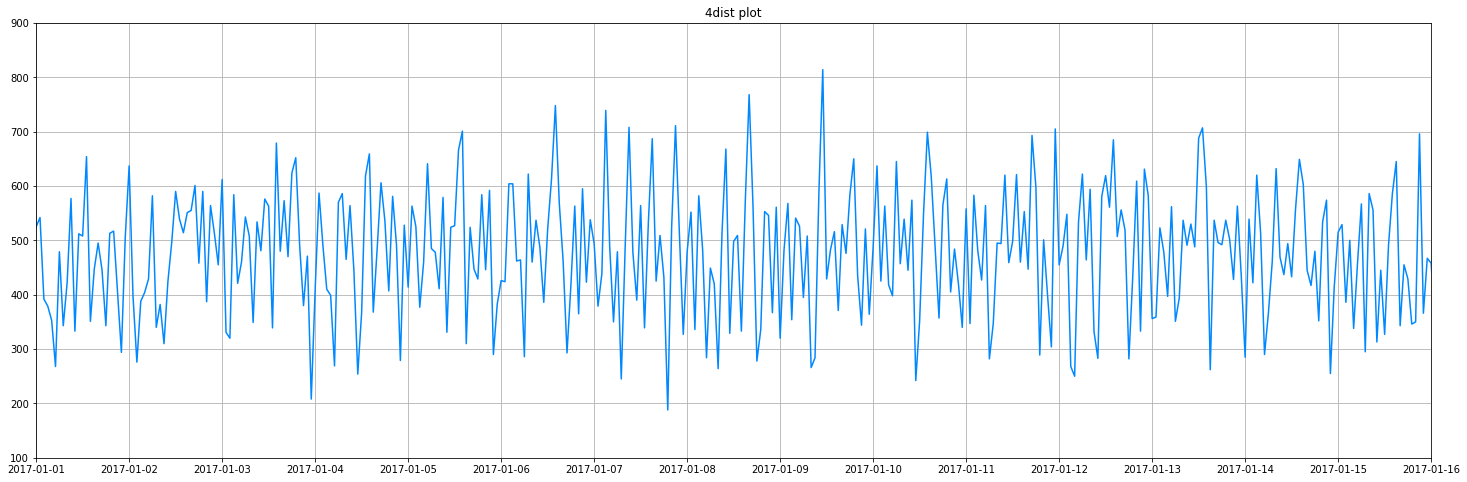

In [129]:
plt.rcParams['figure.figsize'] = (25.0, 8.0)\

x = np.arange(0, len(train_sp), 24)
date = train_sp['datetime'].str.slice(stop=10)
date_x = list(range(len(x)))
for i in range(len(x)):
    j = i * 24
    date_x[i]=date[j]

plt.title("4dist plot")
plt.ylim(100, 900)
plt.xticks(x, labels=date_x)
plt.xlim(0, 360)
plt.grid(True)
plt.plot(train_sp['4dist'], color='#0088ff')

plt.show()

In [49]:
type(train_sp['datetime'])

pandas.core.series.Series

##### error

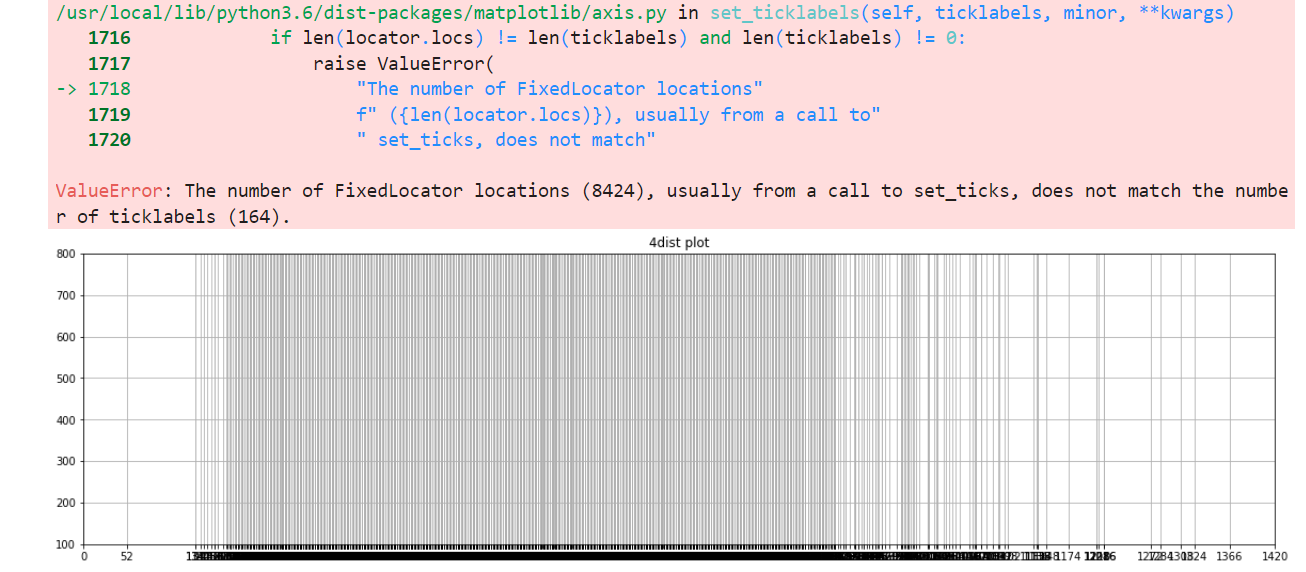

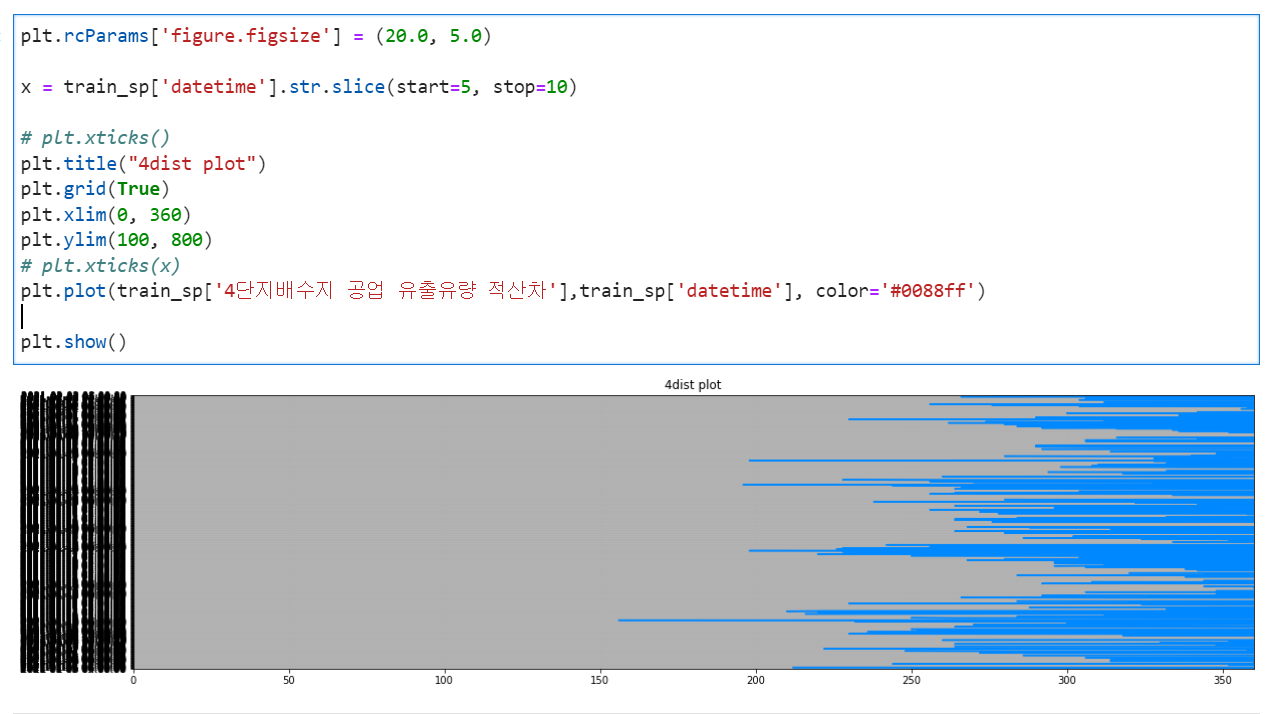

### 데이터 분할

In [130]:
test_size = round(len(train_sp) * 0.2)
train_set = train_sp[: -test_size]
test_set = train_sp[-test_size:]

In [131]:
train_set

,datetime,4dist
0,2017-01-01 01:00:00,525.0
1,2017-01-01 02:00:00,542.0
2,2017-01-01 03:00:00,392.0
3,2017-01-01 04:00:00,379.0
4,2017-01-01 05:00:00,353.0
...,...,...
28045,2020-03-14 14:00:00,418.0
28046,2020-03-14 15:00:00,338.0
28047,2020-03-14 16:00:00,340.0
28048,2020-03-14 17:00:00,372.0


In [132]:
test_set

,datetime,4dist
28050,2020-03-14 19:00:00,172.0
28051,2020-03-14 20:00:00,506.0
28052,2020-03-14 21:00:00,286.0
28053,2020-03-14 22:00:00,396.0
28054,2020-03-14 23:00:00,330.0
...,...,...
35058,2020-12-31 19:00:00,626.0
35059,2020-12-31 20:00:00,294.0
35060,2020-12-31 21:00:00,234.0
35061,2020-12-31 22:00:00,704.0


In [57]:
# 샘플링
sample_size = round(len(train_set) * 0.2)
sample_set = train_set[-sample_size:]

### 데이터 스케일링

In [133]:
train_set['4dist_scale'] = train_set['4dist']

scaler = MinMaxScaler()
train_set[['4dist_scale']] = scaler.fit_transform(train_set[['4dist_scale']])

train_set

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,datetime,4dist,4dist_scale
0,2017-01-01 01:00:00,525.0,0.546909
1,2017-01-01 02:00:00,542.0,0.546910
2,2017-01-01 03:00:00,392.0,0.546904
3,2017-01-01 04:00:00,379.0,0.546904
4,2017-01-01 05:00:00,353.0,0.546903
...,...,...,...
28045,2020-03-14 14:00:00,418.0,0.546905
28046,2020-03-14 15:00:00,338.0,0.546902
28047,2020-03-14 16:00:00,340.0,0.546902
28048,2020-03-14 17:00:00,372.0,0.546903


In [11]:
sample_set['sample_scale'] = train_set['4dist']

scaler = MinMaxScaler()
sample_set[['sample_scale']] = scaler.fit_transform(sample_set[['sample_scale']])
sample_set

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,datetime,4dist,sample_scale
31037,2020-07-17 06:00:00,484.0,0.520767
31038,2020-07-17 07:00:00,490.0,0.530351
31039,2020-07-17 08:00:00,414.0,0.408946
31040,2020-07-17 09:00:00,452.0,0.469649
31041,2020-07-17 10:00:00,428.0,0.431310
...,...,...,...
32130,2020-08-31 19:00:00,462.0,0.485623
32131,2020-08-31 20:00:00,206.0,0.076677
32132,2020-08-31 21:00:00,390.0,0.370607
32133,2020-08-31 22:00:00,326.0,0.268371


In [134]:
train_np = train_set[['4dist_scale']]
train_ts = torch.from_numpy(train_np.values).float()

print(train_ts, '\n', len(train_ts), 'low \n',  type(train_ts))

tensor([[0.5469],
        [0.5469],
        [0.5469],
        ...,
        [0.5469],
        [0.5469],
        [0.5469]]) 
 28050 low 
 <class 'torch.Tensor'>


In [13]:
sample_np = sample_set[['sample_scale']]
sample_ts = torch.from_numpy(sample_np.values).float()

print(sample_ts, '\n', len(sample_ts), 'low \n',  type(train_ts))

tensor([[0.5208],
        [0.5304],
        [0.4089],
        ...,
        [0.3706],
        [0.2684],
        [0.6550]]) 
 1098 low 
 <class 'torch.Tensor'>


In [135]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')

cuda:0 is available


### input 설정

In [136]:
def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws] # 0 ~ 366 -> 367
        label = seq[i+ws:i+ws+1] # 366:367
        out.append((window,label))
    
    return out

In [137]:
window_size = 366
train_data = input_data(train_ts, window_size)
len(train_data)

27684

In [138]:
train_ts[:10].shape

torch.Size([10, 1])

In [139]:
sample_data = input_data(sample_ts, window_size)
len(sample_data)

732

In [140]:
train_data[0][0].shape

torch.Size([366, 1])

In [141]:
# 배치로 나눠주기
trainloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=False, num_workers=2)

In [142]:
print(6228/16)
len(trainloader)

389.25


1731

### 모델

#### 모델 정의

In [143]:
class LSTM(nn.Module):
    
    def __init__(self, input_size = 1, hidden_size = 366, seq = 366, out_size = 1, batch_size= 1): # , batch_size = 1
        super().__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        # self.batch_size = batch_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1, seq, hidden_size),torch.zeros(1, seq, hidden_size))
        
        self.reset_hidden_state()
    
    def reset_hidden_state(self):
        self.hidden = (torch.zeros(self.hidden[0].shape).to(device),
                       torch.zeros(self.hidden[1].shape).to(device))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq , self.hidden)
        pred = self.linear(lstm_out[:,-1])
        return pred

#### 모델 인스턴스화

In [144]:
torch.manual_seed(42)
model = LSTM(batch_size = 16).to(device)
criterion = nn.MSELoss()
# criterion = nn.L1Loss()  #MAE https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [85]:
# batch size,  seq, data size
#         1  ,  366,    1

# 예측값 : 337번째 (seq + )
model

LSTM(
  (lstm): LSTM(1, 366)
  (linear): Linear(in_features=366, out_features=1, bias=True)
)

### 모델 학습

##### data set

In [165]:
epochs = 10
future = 366

loss_list = [0]
pred_list = [0]
train_list = [0]

for i in range(epochs):
    
    progress = tqdm(trainloader)
    for seq, y_train in progress:
        optimizer.zero_grad()
        
        model.reset_hidden_state()
        y_pred = model(seq.to(device))
        loss = criterion(y_pred, y_train.to(device))
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.cpu())
        pred_list.append(y_pred.cpu())
        train_list.append(y_train.cpu())
        
        progress.set_postfix_str(f"Epoch {i} Loss: {loss.item():.7f}")
    # print(f"Epoch {i} Loss: {loss.item():.7f}")
    
    
    # preds = sample_ts[-window_size:].tolist()
    
#     for f in range(future):
#         seq = torch.FloatTensor(preds[-window_size:])
#         with torch.no_grad():
#             model.hidden = (torch.zeros(1,1,model.hidden_size),
#                            torch.zeros(1,1,model.hidden_size))
#             preds.append(model(seq).item())
        
#     loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
#     print(f"Performance on test range: {loss}")
    
#     plt.figure(figsize=(12,4))
#     plt.xlim(6120,6228)
#     plt.grid(True)
#     plt.plot(y.numpy(),color='#8000ff')
#     plt.plot(range(760,800),preds[window_size:],color='#02cccc')
#     plt.show()
print('training Finish')

  0%|          | 0/1731 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([16, 1, 1])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|█████████▉| 1727/1731 [00:21<00:00, 78.07it/s, Epoch 0 Loss: 0.0000061]/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([4, 1, 1])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 1731/1731 [00:21<00:00, 79.67it/s, Epoch 9 Loss: 0.0000134]

training Finish


In [224]:
pred_list.pop(0)
loss_list.pop(0)

0

In [225]:
len(pred_list)

17310

In [273]:
pred_list[0][2][0]

tensor(0.5505, device='cuda:0', grad_fn=<SelectBackward0>)

In [93]:
torch.save(model, 'model1.pt')
torch.save(model.state_dict(), 'model1_stateDict.pt')

In [106]:
#     plt.figure(figsize=(12,4))
#     plt.xlim(6120,6228)
#     plt.grid(True)
#     plt.plot(y.numpy(),color='#8000ff')
#     plt.plot(range(760,800),preds[window_size:],color='#02cccc')
#     plt.show()

# test

In [270]:
test_sp

,datetime,4dist,4dist_scale
0,2021-01-01 00:00:00,366.0,0.257746
1,2021-01-01 01:00:00,486.0,0.342254
2,2021-01-01 02:00:00,364.0,0.256338
3,2021-01-01 03:00:00,356.0,0.250704
4,2021-01-01 04:00:00,500.0,0.352113
...,...,...,...
8419,2021-12-17 19:00:00,690.0,0.485915
8420,2021-12-17 20:00:00,510.0,0.359155
8421,2021-12-17 21:00:00,432.0,0.304225
8422,2021-12-17 22:00:00,564.0,0.397183


In [196]:
test_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8424 entries, 0 to 8423
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     8424 non-null   object 
 1   4dist        8424 non-null   float64
 2   4dist_scale  8424 non-null   float64
dtypes: float64(2), object(1)
memory usage: 197.6+ KB


In [182]:
test_sp['4dist_scale'] = test_sp['4dist']

scaler = MinMaxScaler()
test_sp[['4dist_scale']] = scaler.fit_transform(test_sp[['4dist_scale']])

In [183]:
train_np = train_set[['4dist_scale']]
train_ts = torch.from_numpy(train_np.values).float()

print(train_ts, '\n', len(train_ts), 'low \n',  type(train_ts))

tensor([[0.5469],
        [0.5469],
        [0.5469],
        ...,
        [0.5469],
        [0.5469],
        [0.5469]]) 
 28050 low 
 <class 'torch.Tensor'>


In [184]:
window_size = 366

def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out


test_data = input_data(train_ts, window_size)
len(test_data)

27684

In [187]:
testloader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False, num_workers=2)

In [255]:
output = [0]

with torch.no_grad():
    for seq, y_train in tqdm(testloader):
        outputs = model(seq.cuda())
        
        outputs = outputs.cpu()
        
        output.append(outputs[0][0])

100%|██████████| 27684/27684 [01:33<00:00, 294.90it/s]


In [230]:
import sys
print(sys.version)
print(torch.__version__)

3.6.9 (default, Jun 29 2022, 11:45:57) 
[GCC 8.4.0]
1.10.1+cu102


In [256]:
output[0]

0

In [257]:
output.pop(0)

0

In [258]:
output[0:10]

[tensor(0.5457),
 tensor(0.5457),
 tensor(0.5457),
 tensor(0.5457),
 tensor(0.5457),
 tensor(0.5457),
 tensor(0.5457),
 tensor(0.5457),
 tensor(0.5457),
 tensor(0.5457)]

In [259]:
len(output)

27684

In [247]:
out_ts = torch.stack(output, dim=0)

In [260]:
for i in range(len(output)):
    num = output[i]
    output[i] = num.numpy()

In [261]:
output[0]

array(0.54570407, dtype=float32)

In [263]:
test_df

,0
0,0.545704
1,0.545704
2,0.545704
3,0.545704
4,0.545704
...,...
27679,0.545704
27680,0.545704
27681,0.545704
27682,0.545704


In [265]:
test_df = scaler.inverse_transform(test_df)

array([[1100357.8],
       [1100357.8],
       [1100357.8],
       ...,
       [1100357.8],
       [1100357.8],
       [1100357.8]], dtype=float32)

In [278]:
test_df[:20]

array([[1100357.8],
       [1100357.8],
       [1100357.8],
       [1100357.8],
       [1100357.8],
       [1100357.8],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6],
       [1100357.6]], dtype=float32)

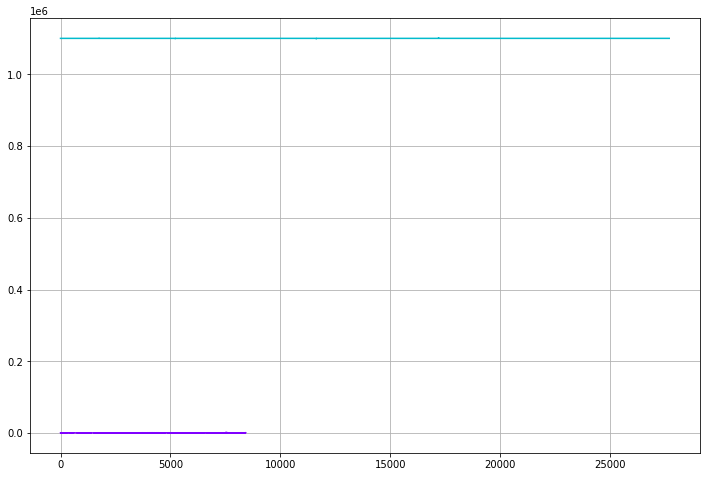

In [287]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(test_sp['4dist'],color='#8000ff')
plt.plot(test_df,color='#02bbcc')
plt.show()

In [ ]:
testmodel = torch.load('model_test.pt')

In [ ]:
testmodel

LSTM(
  (lstm): LSTM(1, 366)
  (linear): Linear(in_features=366, out_features=366, bias=True)
)

In [ ]:
testmodel.load_state_dict(torch.load('model_stateDict_test.pt'))

<All keys matched successfully>

In [ ]:
testmodel

LSTM(
  (lstm): LSTM(1, 366)
  (linear): Linear(in_features=366, out_features=366, bias=True)
)

In [ ]:
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())


lstm.weight_ih_l0 	 torch.Size([1464, 1])
lstm.weight_hh_l0 	 torch.Size([1464, 366])
lstm.bias_ih_l0 	 torch.Size([1464])
lstm.bias_hh_l0 	 torch.Size([1464])
linear.weight 	 torch.Size([366, 366])
linear.bias 	 torch.Size([366])


In [ ]:
for param_tensor in testmodel.state_dict():
    print(param_tensor, "\t", testmodel.state_dict()[param_tensor].size())


lstm.weight_ih_l0 	 torch.Size([1464, 1])
lstm.weight_hh_l0 	 torch.Size([1464, 366])
lstm.bias_ih_l0 	 torch.Size([1464])
lstm.bias_hh_l0 	 torch.Size([1464])
linear.weight 	 torch.Size([366, 366])
linear.bias 	 torch.Size([366])


##### sample set

In [174]:
epochs = 10
future = 40

loss_sum = 0 
loss_total = 0

for i in range(epochs):
    
    for seq, y_train in tqdm(sample_data):
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size).to(device),
                       torch.zeros(1,1,model.hidden_size).to(device)
        )
        y_pred = model(seq.to(device))
        loss = criterion(y_pred, y_train.to(device))
        loss.backward()
        optimizer.step()
        
        loss_sum += loss
        loss_total += 1
        
    loss_list[i] = loss_sum / loss_total
    print(f"Epoch {i} Loss: {loss.item():.7f}")
    
#     preds = sample_ts[-window_size:].tolist()
    
#     for f in range(future): #
#         seq = torch.FloatTensor(preds[-window_size:])
#         with torch.no_grad():
#             model.hidden = (torch.zeros(1,1,model.hidden_size),
#                            torch.zeros(1,1,model.hidden_size))
#             preds.append(model(seq).item())
        
#     loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
#     print(f"Performance on test range: {loss:.7f}")
    
    # plt.figure(figsize=(12,4))
    # plt.xlim(6120,6228)
    # plt.grid(True)
    # plt.plot(y.numpy(),color='#8000ff')
    # plt.plot(range(760,800),preds[window_size:],color='#02cccc')
    # plt.show()

100%|██████████| 732/732 [00:29<00:00, 24.53it/s]

Epoch 0 Loss: 0.0007576


RuntimeError: Input and parameter tensors are not at the same device, found input tensor at cpu and parameter tensor at cuda:0

##### 오류

In [249]:
test_df = pd.DataFrame(output)

ValueError: Must pass 2-d input. shape=(27684, 1, 1)